# XGBoost early stopping

In [30]:
from xgboost import XGBClassifier
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

In [31]:
data = pd.read_csv("pima-indians-diabetes.data.csv", header=None)
features = data.loc[:,0:7]
labels = data.loc[:,8]

Splitting data for cross-validation:

In [32]:
seed, test_size = 7, 0.33
X_train, X_test, Y_train, Y_test = train_test_split(features, labels,
                                                   test_size=test_size,
                                                   random_state=seed)

Using an evaluation metric, we can monitor the performance of the classifier over every iteration / epoch:

In [46]:
eval_set = [(X_train, Y_train),(X_test, Y_test)]
metrics = ["error", "logloss"]

model = XGBClassifier()
model.fit(X_train, Y_train, eval_metric=metrics, eval_set=eval_set, verbose=False)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [47]:
Y_pred = model.predict(X_test)
predictions = [round(value) for value in Y_pred]

accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.95%


The data can be plotted to spot the best time to stop the model:

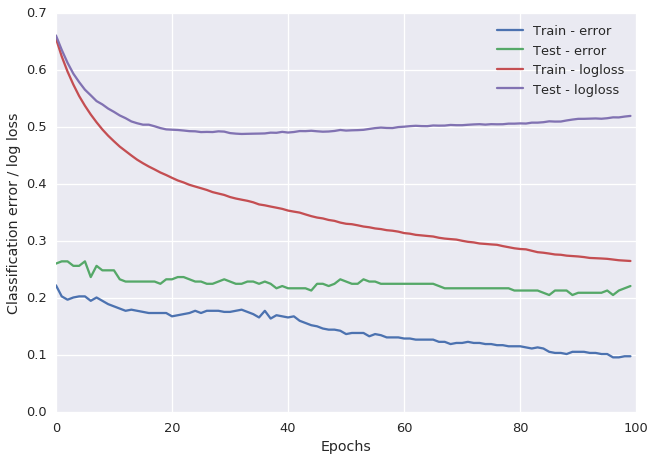

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')

results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Epochs")
ax.set_ylabel("Classification error / log loss")


for metric in metrics:
    ax.plot(x_axis, results['validation_0'][metric], label="Train - %s" % metric)
    ax.plot(x_axis, results['validation_1'][metric], label="Test - %s" % metric)
    
plt.legend()


In [51]:
model = XGBClassifier()
model.fit(X_train, Y_train, 
          early_stopping_rounds=10, 
          eval_metric=metrics[1], 
          eval_set=[eval_set[1]], 
          verbose=True)

[0]	validation_0-logloss:0.660186
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.634854
[2]	validation_0-logloss:0.612239
[3]	validation_0-logloss:0.593118
[4]	validation_0-logloss:0.578303
[5]	validation_0-logloss:0.564942
[6]	validation_0-logloss:0.555113
[7]	validation_0-logloss:0.54499
[8]	validation_0-logloss:0.539151
[9]	validation_0-logloss:0.531819
[10]	validation_0-logloss:0.526065
[11]	validation_0-logloss:0.51977
[12]	validation_0-logloss:0.514979
[13]	validation_0-logloss:0.50927
[14]	validation_0-logloss:0.506086
[15]	validation_0-logloss:0.503565
[16]	validation_0-logloss:0.503591
[17]	validation_0-logloss:0.500805
[18]	validation_0-logloss:0.497605
[19]	validation_0-logloss:0.495328
[20]	validation_0-logloss:0.494777
[21]	validation_0-logloss:0.494274
[22]	validation_0-logloss:0.493333
[23]	validation_0-logloss:0.492211
[24]	validation_0-logloss:0.491936
[25]	validation_0-logloss:0.490578
[26]	validation_0-logloss:0.490895


XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [52]:
Y_pred = model.predict(X_test)
predictions = [round(value) for value in Y_pred]

accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 78.35%
